In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from numpy.linalg import norm
from scipy.stats import wasserstein_distance as wd

In [2]:
torch.manual_seed(111)

In [3]:
def amplitude_finder_minmax(signal):
    return (torch.max(signal, dim=1).values - torch.min(signal, dim=1).values)/2

def sinfunc(t, A, w, p, c):  
    return A * np.sin(w*t + p) + c

def fit_sin(yys, n_samples):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.arange(n_samples)
    amplitudes = []
    for yy in yys:
        yy = np.array(yy)
        ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
        Fyy = abs(np.fft.fft(yy))
        guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
        guess_amp = np.std(yy) * 2.**0.5
        guess_offset = np.mean(yy)
        guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        f = w/(2.*np.pi)
        
        amplitudes.append(A)
    return amplitudes

In [4]:
df = pd.read_pickle('../Dataset/data_frame_sine_normal.pkl')
df

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,ID
0,-0.035391,0.115991,0.067295,0.087940,-0.005608,0.148591,0.184206,0.190889,0.173586,0.244413,...,-0.124302,-0.094368,-0.091004,-0.103870,-0.063754,-0.038765,-0.073207,-0.102875,0.049369,1
1,0.047637,0.097261,0.026598,-0.051855,0.062732,0.069438,0.161117,0.145385,0.160508,0.253621,...,-0.071299,-0.010991,-0.106436,-0.056446,-0.078345,0.026318,-0.111282,0.013165,-0.019609,1
2,0.055093,0.007936,0.009689,0.153550,0.185074,0.134775,0.119403,0.152841,0.115216,0.173392,...,-0.022322,-0.086159,-0.212639,-0.005879,0.015376,-0.038609,0.025046,-0.111319,-0.038919,1
3,-0.013779,0.120902,-0.018960,0.111175,0.049376,0.032356,0.097953,0.161946,0.173678,0.157668,...,-0.134095,-0.111514,-0.051223,-0.074050,0.010472,-0.028539,-0.081804,0.033222,-0.019628,1
4,-0.127326,-0.064971,0.044535,0.026570,0.145302,0.170157,0.120066,0.169390,0.312615,0.219299,...,-0.122435,-0.147184,-0.121439,-0.105604,-0.021238,-0.128750,-0.003523,-0.173485,-0.117928,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000891,0.025625,-0.034680,0.154365,0.182432,0.179724,0.136781,0.178158,0.241500,0.324716,...,-0.189024,-0.063634,-0.182209,-0.104458,-0.116090,-0.034789,0.008455,0.017042,-0.088317,2
1996,0.135667,0.029721,0.138208,0.131906,0.135514,0.182828,0.204233,0.308974,0.342178,0.346723,...,-0.218346,-0.166977,-0.161725,-0.135058,-0.203722,-0.076044,-0.053023,-0.033323,-0.073385,2
1997,-0.068050,-0.010972,0.075399,0.092492,0.102017,0.118001,0.239143,0.233352,0.370220,0.332701,...,-0.252975,-0.108026,-0.080961,-0.023150,-0.107980,-0.064374,0.029766,0.028783,-0.011776,2
1998,-0.020807,-0.050819,0.086758,0.205127,0.167466,0.197376,0.222899,0.230911,0.251630,0.332942,...,-0.206111,-0.228985,-0.122452,-0.169123,-0.079158,-0.024059,-0.063914,0.039456,0.010089,2


In [5]:
p = 10
q = p-3

data = df.sample(frac=1).reset_index(drop=True)[:2**p]
data

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,ID
0,0.063993,0.167112,0.012235,0.090573,0.156531,0.135530,0.230930,0.218317,0.293600,0.327223,...,-0.163912,-0.155780,-0.116378,-0.125048,-0.106652,-0.098604,-0.030456,-0.014999,-0.039547,2
1,-0.044895,-0.001010,-0.041821,0.027538,0.032892,0.172604,0.178688,0.177497,0.267950,0.238287,...,-0.023511,-0.027911,-0.061090,-0.012446,-0.039144,-0.025404,-0.032718,-0.018438,-0.080327,1
2,-0.051823,0.064037,0.051326,0.025255,0.034381,0.132903,0.147835,0.242700,0.185870,0.180267,...,-0.206808,-0.067075,-0.098712,-0.041621,-0.070403,-0.072060,-0.038107,-0.021131,-0.069107,1
3,-0.028828,0.001923,0.037022,0.001052,0.055943,0.176786,0.181449,0.172130,0.256132,0.149013,...,-0.160988,-0.119725,-0.134620,-0.038050,-0.086493,-0.031827,-0.063450,-0.046319,-0.021688,1
4,0.031991,0.005315,0.020500,0.155646,0.132781,0.102885,0.191918,0.235504,0.300436,0.216564,...,-0.179342,-0.092121,-0.163514,-0.092928,-0.071808,-0.079085,-0.039653,-0.012883,-0.029151,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,-0.058959,0.024915,0.145211,0.079258,0.138997,0.134439,0.194258,0.211104,0.288327,0.308821,...,-0.219967,-0.156552,-0.190085,-0.099092,-0.139493,-0.047051,-0.058997,0.065173,0.056013,2
1020,-0.030115,0.006691,0.100818,0.111683,0.138126,0.234396,0.069762,0.273082,0.289049,0.349779,...,-0.087351,-0.130892,-0.135699,-0.038823,-0.081858,-0.129673,-0.071672,0.042477,-0.003592,2
1021,0.015713,0.007720,0.036429,0.064465,0.166850,0.114512,0.128442,0.161270,0.246764,0.425456,...,-0.094860,-0.103669,-0.138405,-0.098570,-0.067767,-0.062635,-0.020369,-0.001974,-0.065735,2
1022,0.013450,0.033564,0.069895,0.026343,0.038459,0.095534,0.206134,0.172296,0.319230,0.229285,...,-0.159547,-0.069873,-0.086415,-0.167946,-0.125984,-0.147787,-0.087129,-0.053459,-0.023744,2


In [6]:
train_id = torch.tensor(data['ID'].values.astype(np.float32))
train = torch.tensor(data.drop('ID', axis = 1).values.astype(np.float32)) 
train_tensor = torch.utils.data.TensorDataset(train, train_id) 

In [7]:
n_groups = 2
num_epochs = 200
batch_size = 32
n_samples = 800
real_data_fraction = 1
criterion='BCE'
with_CD=True
LSTM_G=True
LSTM_D=True
CD_type = 'MLP'
generator_lr = 0.001
discriminator_lr = 0.001
central_discriminator_lr = 0.0001
gamma_value=5.0

In [8]:
kwargs = {'pin_memory': True}
train_loader = torch.utils.data.DataLoader(
    train_tensor, batch_size=batch_size, shuffle=True, **kwargs
)

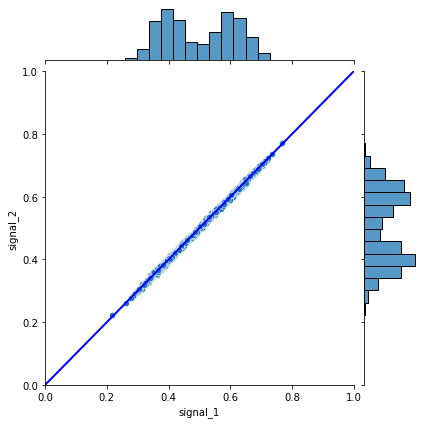

In [9]:
results_real_sin = pd.DataFrame()

signals = train[:1000]

signal_1 = signals[:, :n_samples]
signal_2 = signals[:, n_samples:]
    
results_real_sin['signal_1'] = fit_sin(signal_1.detach(), n_samples)
results_real_sin['signal_2'] = fit_sin(signal_2.detach(), n_samples)

plot = sns.jointplot(data=results_real_sin, x="signal_1", y="signal_2")
plot.ax_joint.set_xlim(0,1)
plot.ax_joint.set_ylim(0,1)
plot.ax_joint.plot([0,1], [0,1], 'b-', linewidth = 2)
plt.show()

In [10]:
wd(results_real_sin['signal_1'], results_real_sin['signal_1'])

0.0

In [11]:
p1 = np.array([0,0])
p2 = np.array([1,1])

denum = norm(p2-p1)
results_real_sin['distance'] = np.zeros(len(results_real_sin['signal_1']))

for index, row in results_real_sin.iterrows():
    results_real_sin['distance'][index] = norm(np.cross(p2-p1, p1-np.array([row[0], row[1]])))/denum

MSE = results_real_sin['distance'].mean()
print(MSE)

0.0020184743252883485


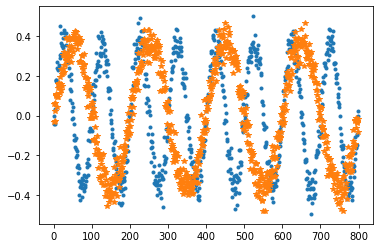

In [12]:
plt.plot(data.iloc[1,:800], ".")
plt.plot(data.iloc[1,800:-1], '*')

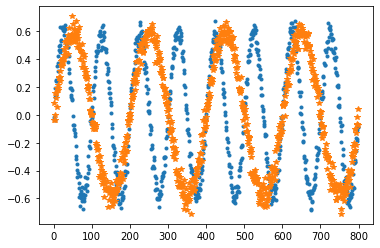

In [13]:
plt.plot(data.iloc[40,:800], ".")
plt.plot(data.iloc[40,800:-1], '*')

In [14]:
noise_len = 32
alpha = 0.1

In [15]:
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.normal(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [16]:
class PairwiseDiscriminator(nn.Module):
    def __init__(self, n_channels, alpha):
        super().__init__()
        self.n_channels = n_channels
        n_corr_values = n_channels * (n_channels - 1) // 2
        layers = []
        while np.log2(n_corr_values) > 1:
            layers.append(nn.Linear(n_corr_values, n_corr_values // 2))
            layers.append(nn.LeakyReLU(alpha))
            layers.append(nn.Dropout(0.3))
            n_corr_values = n_corr_values // 2
        layers.append(nn.Linear(n_corr_values, 1))
        layers.append(nn.Sigmoid())
        self.classifier = nn.Sequential(*layers)
        
        self.pairwise_correlation = torch.corrcoef
        self.upper_triangle = lambda x: x[torch.triu(torch.ones(n_channels, n_channels), diagonal=1) == 1]

    def forward(self, x):     
        final_upper_trianle = []
        for i in range(x.shape[0]):
            pairwise_correlation = self.pairwise_correlation(x[i,:].transpose(0,1))
            upper_triangle = self.upper_triangle(pairwise_correlation)
            final_upper_trianle.append(upper_triangle)
        final_upper_trianle = torch.stack(final_upper_trianle)
        return self.classifier(final_upper_trianle)
class LSTMDiscriminator(nn.Module):
    """Discriminator with LSTM"""
    def __init__(self, ts_dim, hidden_dim=256, num_layers=1):
        super(LSTMDiscriminator, self).__init__()
        
        self.hidden_dim = hidden_dim

        self.lstm = nn.LSTM(ts_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Sequential(nn.Linear(hidden_dim, 1), nn.Sigmoid())

    def forward(self, x):
        x = x.reshape(x.shape[0], 1, x.shape[1])
        out, _ = self.lstm(x)
        out = self.linear(out.view(x.size(0) * x.size(1), self.hidden_dim))
        out = out.view(x.size(0), x.size(1))
        return out

class Discriminator(nn.Module):
    def __init__(self, n_samples, alpha):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_samples, 256),
            # nn.BatchNorm1d(256),
            nn.LeakyReLU(alpha),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            # nn.BatchNorm1d(128),
            nn.LeakyReLU(alpha),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            # nn.BatchNorm1d(64),
            nn.LeakyReLU(alpha),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
discriminators = {}
if LSTM_D:
    for i in range(n_groups):
        discriminators[i] = LSTMDiscriminator(ts_dim=n_samples)

else:
    for i in range(n_groups):
        discriminators[i] = Discriminator(n_samples=n_samples, alpha=alpha).apply(initialize_weights)

for i in range(n_groups):
    discriminators[i] = nn.DataParallel(discriminators[i]).to(device)
    discriminators[i].to(device)  

In [19]:
class LSTMGenerator(nn.Module):
    """Generator with LSTM"""
    def __init__(self, latent_dim, ts_dim, hidden_dim=256, num_layers=1):
        super(LSTMGenerator, self).__init__()

        self.ts_dim = ts_dim
        self.hidden_dim = hidden_dim

        self.lstm = nn.LSTM(latent_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, ts_dim)

    def forward(self, x):
        x = x.reshape(x.shape[0], 1, x.shape[1])
        out, _ = self.lstm(x)
        out = self.linear(out.view(x.size(0) * x.size(1), self.hidden_dim))
        out = out.view(x.size(0), self.ts_dim)
        return out

class Generator(nn.Module):
    def __init__(self, noise_len, n_samples, alpha):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_len, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(alpha),
            nn.Dropout(0.3),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(alpha),
            nn.Dropout(0.3),
            nn.Linear(512, n_samples)
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [20]:
generators = {}
if LSTM_G:
    for i in range(n_groups):
        generators[i] = LSTMGenerator(latent_dim=noise_len, ts_dim=n_samples)

else:
    for i in range(n_groups):
        generators[i] = Generator(noise_len=noise_len, n_samples=n_samples, alpha=alpha).apply(initialize_weights)

for i in range(n_groups):
    generators[i] = nn.DataParallel(generators[i])
    generators[i].to(device)

In [21]:
central_discriminator = Discriminator(n_samples = n_groups*n_samples, alpha = alpha)
central_discriminator = central_discriminator.apply(initialize_weights)
central_discriminator = nn.DataParallel(central_discriminator)
central_discriminator.to(device)

/var/folders/tl/k1xkj3sd1331_s825hqtyvy00000gs/T/ipykernel_5398/1624428177.py:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  nn.init.normal(m.weight.data, 0.0, 0.02)


DataParallel(
  (module): Discriminator(
    (model): Sequential(
      (0): Linear(in_features=1600, out_features=256, bias=True)
      (1): LeakyReLU(negative_slope=0.1)
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=256, out_features=128, bias=True)
      (4): LeakyReLU(negative_slope=0.1)
      (5): Dropout(p=0.3, inplace=False)
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): LeakyReLU(negative_slope=0.1)
      (8): Dropout(p=0.3, inplace=False)
      (9): Linear(in_features=64, out_features=1, bias=True)
      (10): Sigmoid()
    )
  )
)

In [22]:
gamma = [5.0]*num_epochs
if criterion == 'BCE':
    loss_function = nn.BCELoss()
elif criterion == 'MSE':
    loss_function = nn.MSELoss()

In [23]:
optimizers_D = {}
optimizers_G = {}
for i in range(n_groups):
    optimizers_D[i] = torch.optim.Adam(discriminators[i].parameters(), lr=discriminator_lr, betas=[0.5, 0.9])
    optimizers_G[i] = torch.optim.Adam(generators[i].parameters(), lr=generator_lr, betas=[0.5, 0.9])

if with_CD:
    if CD_type == 'LSTM':
        central_discriminator = LSTMDiscriminator(ts_dim=n_samples, num_layers=n_groups)
    elif CD_type == 'MLP':
        central_discriminator = Discriminator(n_samples = n_groups*n_samples, alpha = alpha)
        central_discriminator = central_discriminator.apply(initialize_weights)
    elif CD_type == 'Pairwise':
        central_discriminator = PairwiseDiscriminator(n_channels = n_groups, alpha = alpha)
        central_discriminator = central_discriminator.apply(initialize_weights)

    central_discriminator = nn.DataParallel(central_discriminator)
    central_discriminator.to(device)
    optimizer_central_discriminator = torch.optim.Adam(central_discriminator.parameters(), lr=central_discriminator_lr, betas=[0.5, 0.9])

/var/folders/tl/k1xkj3sd1331_s825hqtyvy00000gs/T/ipykernel_5398/1624428177.py:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  nn.init.normal(m.weight.data, 0.0, 0.02)


Epoch: 0 Loss D1.: 0.384448766708374
Epoch: 0 Loss G1.: -2.2379369735717773
Epoch: 0 Loss D2.: 0.39193195104599
Epoch: 0 Loss G2.: -2.288726806640625
Epoch: 0 Loss CD.: 0.6298511624336243


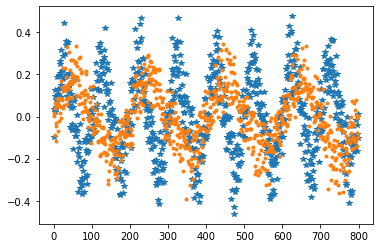

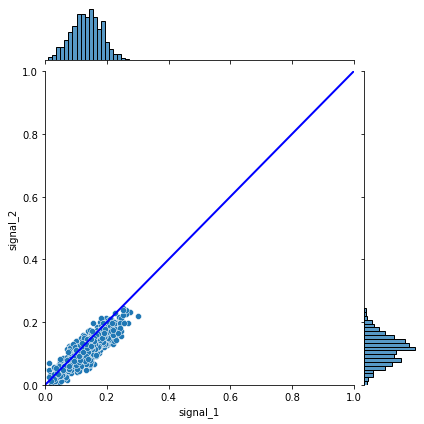

Epoch: 0 MSE: 0.017619080480805762


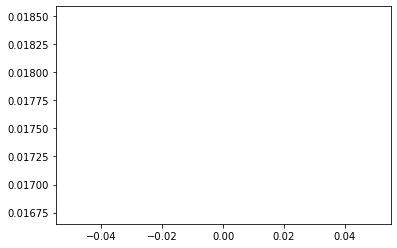

Epoch: 0 WD signal 1: 0.36733940013236666
Epoch: 0 WD signal 2: 0.38704922690484544


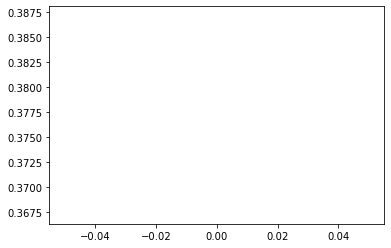

Epoch: 10 Loss D1.: 0.7450769543647766
Epoch: 10 Loss G1.: -2.7022950649261475
Epoch: 10 Loss D2.: 0.6718924641609192
Epoch: 10 Loss G2.: -2.5883545875549316
Epoch: 10 Loss CD.: 0.6935840249061584


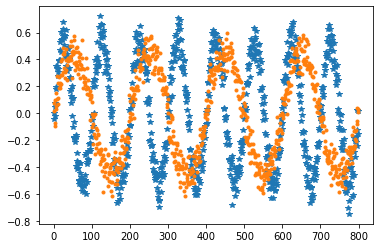

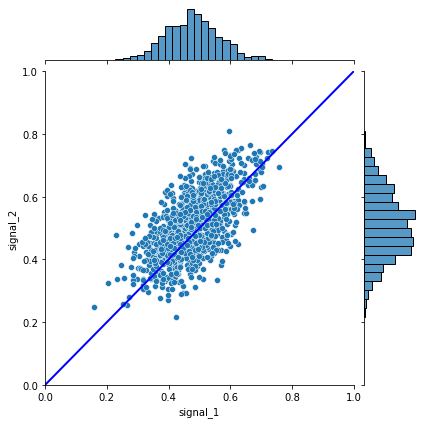

Epoch: 10 MSE: 0.04958239357425349


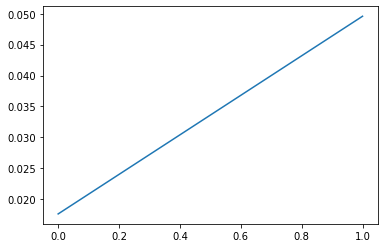

Epoch: 10 WD signal 1: 0.03575193944902549
Epoch: 10 WD signal 2: 0.024093705869449793


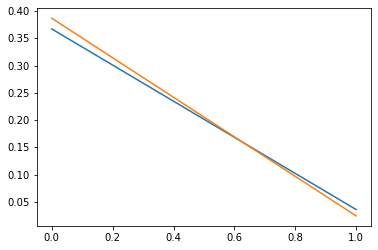

Epoch: 20 Loss D1.: 0.6564516425132751
Epoch: 20 Loss G1.: -2.5512969493865967
Epoch: 20 Loss D2.: 0.6853564381599426
Epoch: 20 Loss G2.: -2.5624923706054688
Epoch: 20 Loss CD.: 0.6925780773162842


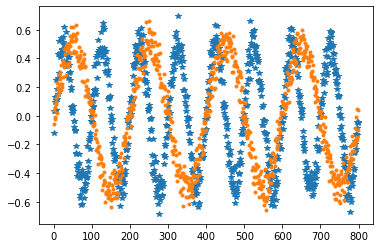

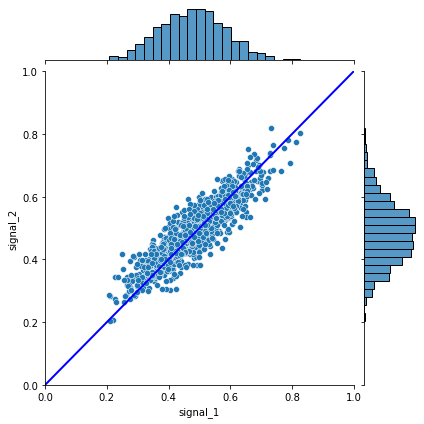

Epoch: 20 MSE: 0.026902810348827473


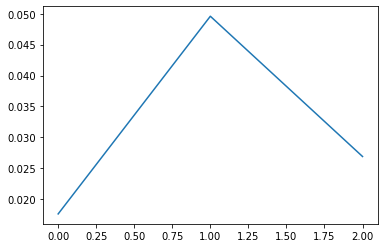

Epoch: 20 WD signal 1: 0.02736444883190014
Epoch: 20 WD signal 2: 0.02792362642457071


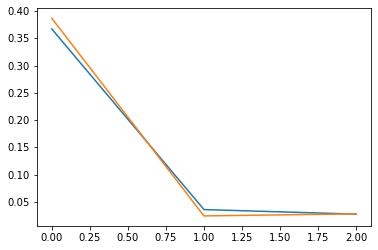

Epoch: 30 Loss D1.: 0.7461941838264465
Epoch: 30 Loss G1.: -2.7524373531341553
Epoch: 30 Loss D2.: 0.7074704170227051
Epoch: 30 Loss G2.: -2.6824939250946045
Epoch: 30 Loss CD.: 0.6923424601554871


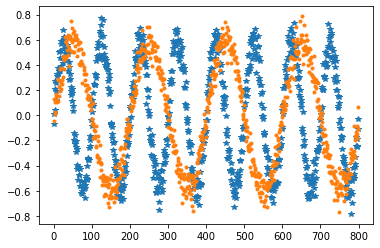

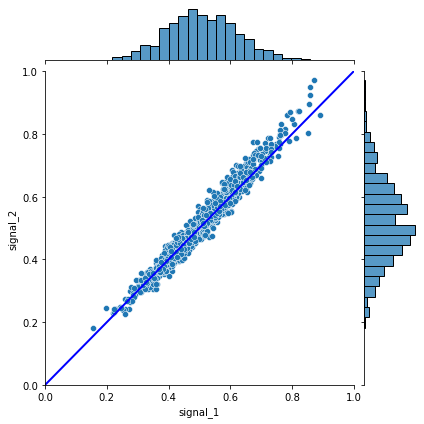

Epoch: 30 MSE: 0.014913967897640887


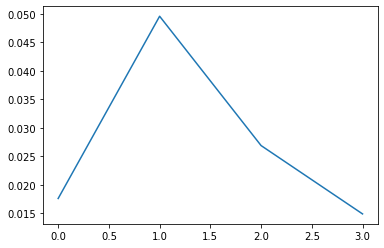

Epoch: 30 WD signal 1: 0.024352426835841184
Epoch: 30 WD signal 2: 0.026624406310795996


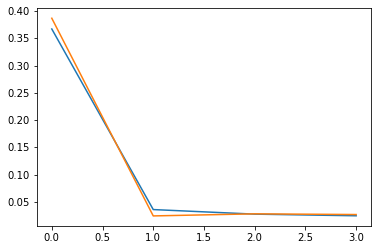

Epoch: 40 Loss D1.: 0.6855799555778503
Epoch: 40 Loss G1.: -2.649913787841797
Epoch: 40 Loss D2.: 0.783600389957428
Epoch: 40 Loss G2.: -2.7255685329437256
Epoch: 40 Loss CD.: 0.6907413601875305


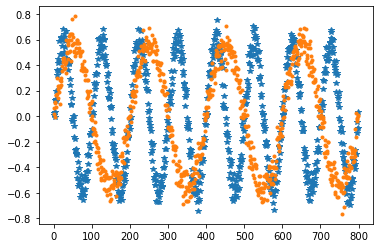

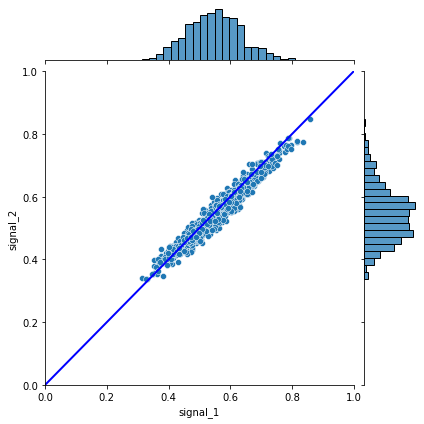

Epoch: 40 MSE: 0.012625686353281217


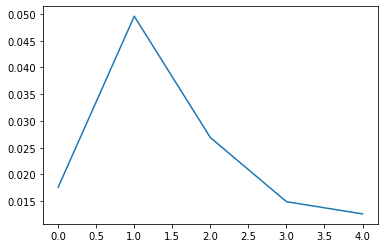

Epoch: 40 WD signal 1: 0.04788081785379051
Epoch: 40 WD signal 2: 0.044974352100043316


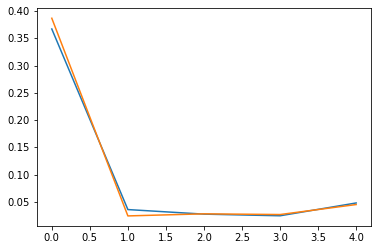

Epoch: 50 Loss D1.: 0.6796647310256958
Epoch: 50 Loss G1.: -2.5150794982910156
Epoch: 50 Loss D2.: 0.6423251032829285
Epoch: 50 Loss G2.: -2.6024341583251953
Epoch: 50 Loss CD.: 0.6905500292778015


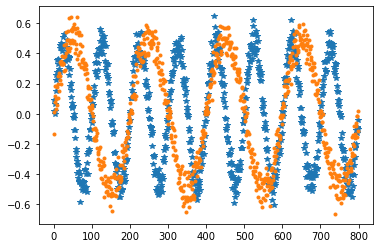

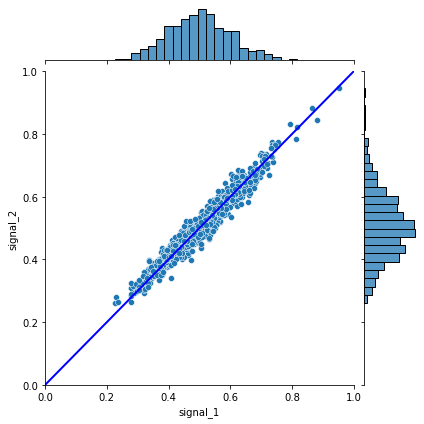

Epoch: 50 MSE: 0.012854338045917743


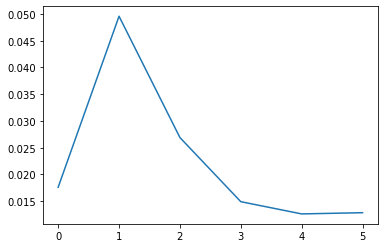

Epoch: 50 WD signal 1: 0.02652750097620688
Epoch: 50 WD signal 2: 0.02790390426823567


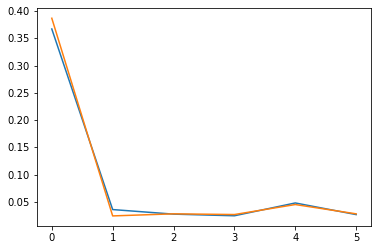

Epoch: 60 Loss D1.: 0.636551558971405
Epoch: 60 Loss G1.: -2.6921896934509277
Epoch: 60 Loss D2.: 0.691435694694519
Epoch: 60 Loss G2.: -2.6645004749298096
Epoch: 60 Loss CD.: 0.6926273703575134


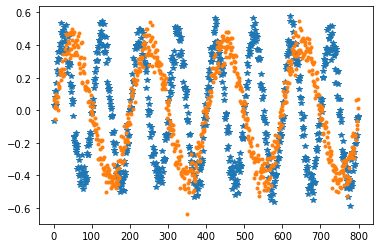

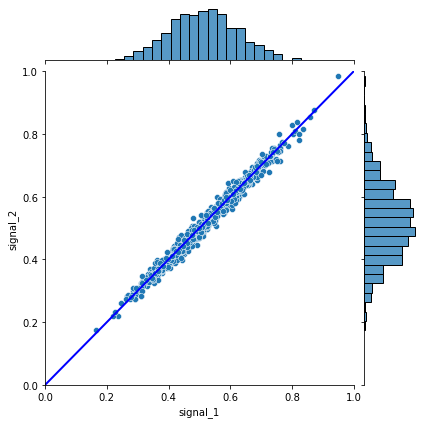

Epoch: 60 MSE: 0.007962028681845224


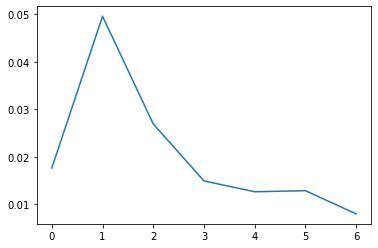

Epoch: 60 WD signal 1: 0.024884504853326814
Epoch: 60 WD signal 2: 0.0243964605835712


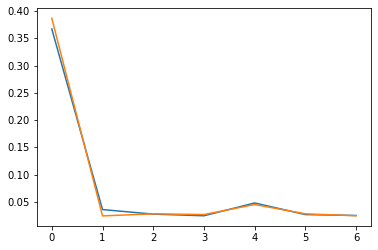

Epoch: 70 Loss D1.: 0.7448377013206482
Epoch: 70 Loss G1.: -2.4923934936523438
Epoch: 70 Loss D2.: 0.7264658808708191
Epoch: 70 Loss G2.: -2.6850860118865967
Epoch: 70 Loss CD.: 0.6916940808296204


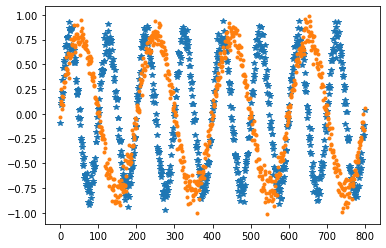

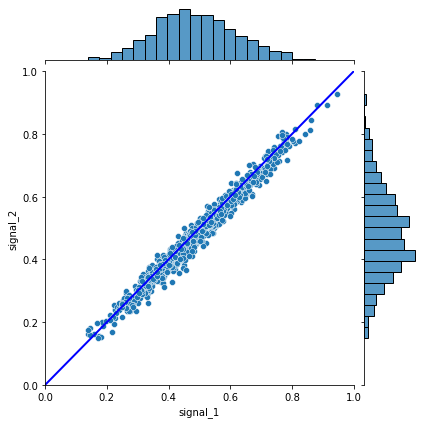

Epoch: 70 MSE: 0.013401434839589667


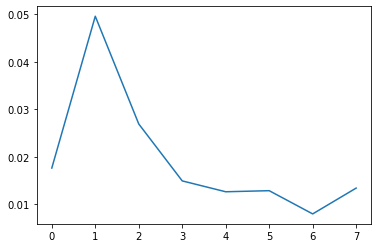

Epoch: 70 WD signal 1: 0.02752593199557027
Epoch: 70 WD signal 2: 0.03215164940296109


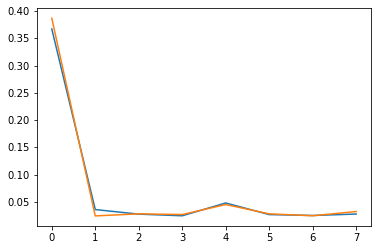

Epoch: 80 Loss D1.: 0.6852075457572937
Epoch: 80 Loss G1.: -2.8074872493743896
Epoch: 80 Loss D2.: 0.7037321329116821
Epoch: 80 Loss G2.: -2.7968013286590576
Epoch: 80 Loss CD.: 0.6913027167320251


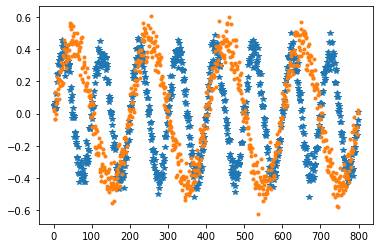

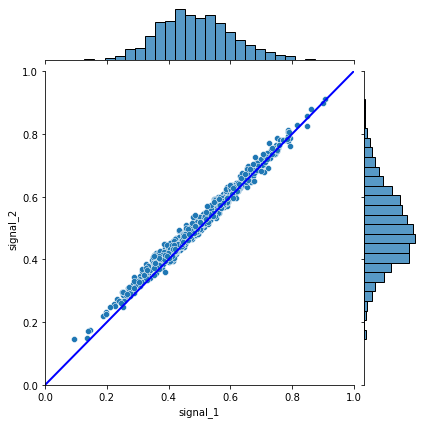

Epoch: 80 MSE: 0.012690916867089608


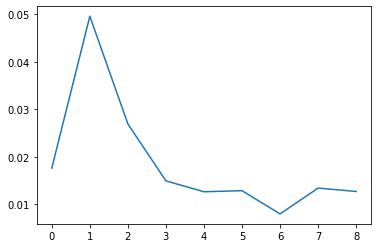

Epoch: 80 WD signal 1: 0.02479531449786483
Epoch: 80 WD signal 2: 0.024086366455601173


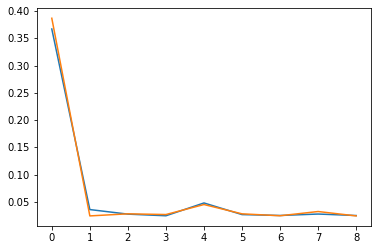

Epoch: 90 Loss D1.: 0.6708804368972778
Epoch: 90 Loss G1.: -2.756214141845703
Epoch: 90 Loss D2.: 0.7384583950042725
Epoch: 90 Loss G2.: -2.802908182144165
Epoch: 90 Loss CD.: 0.6986750960350037


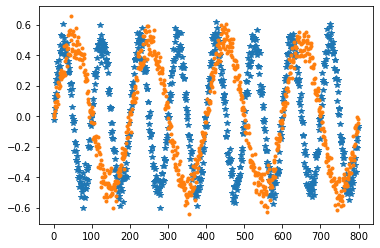

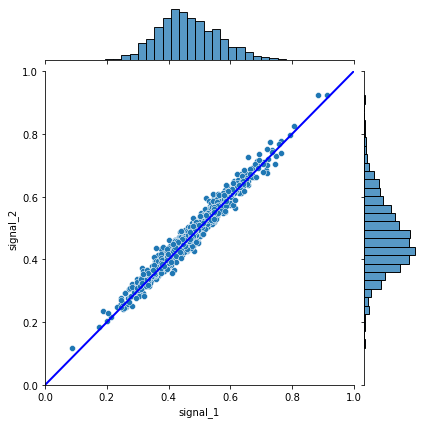

Epoch: 90 MSE: 0.011248397100265508


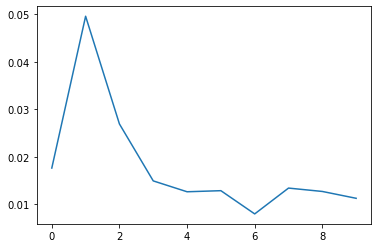

Epoch: 90 WD signal 1: 0.03833652994206138
Epoch: 90 WD signal 2: 0.032113521336401746


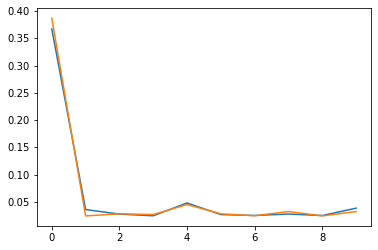

Epoch: 100 Loss D1.: 0.7174323797225952
Epoch: 100 Loss G1.: -2.617969512939453
Epoch: 100 Loss D2.: 0.7204510569572449
Epoch: 100 Loss G2.: -2.4654159545898438
Epoch: 100 Loss CD.: 0.6934245824813843


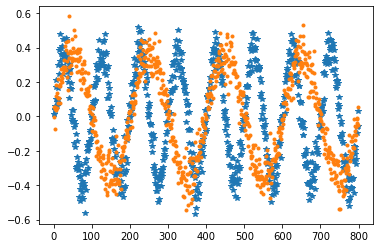

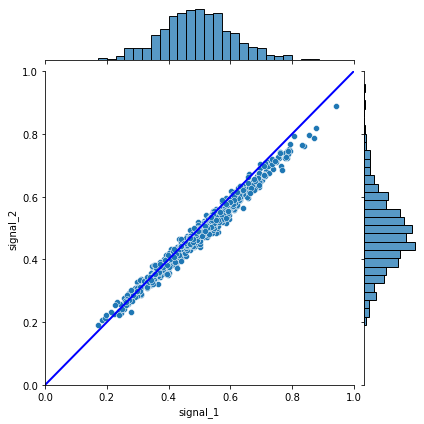

Epoch: 100 MSE: 0.013582649153801802


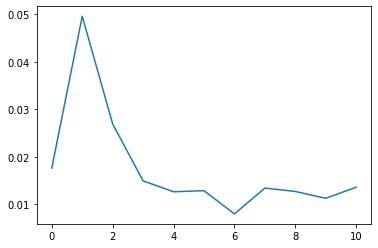

Epoch: 100 WD signal 1: 0.026458884613756048
Epoch: 100 WD signal 2: 0.030205046391016205


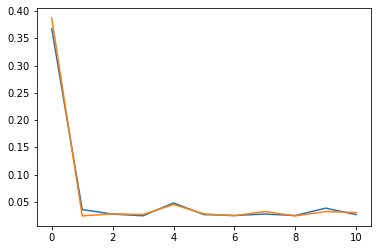

Epoch: 110 Loss D1.: 0.6422284245491028
Epoch: 110 Loss G1.: -2.3308544158935547
Epoch: 110 Loss D2.: 0.6559209227561951
Epoch: 110 Loss G2.: -2.339103937149048
Epoch: 110 Loss CD.: 0.6912713050842285


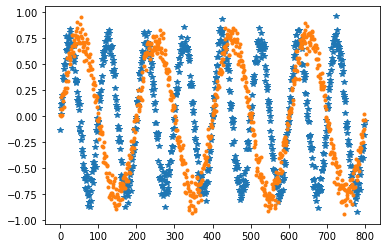

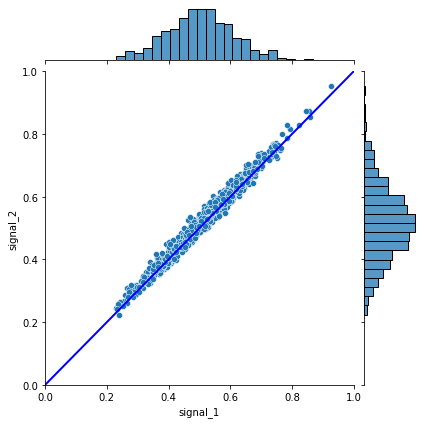

Epoch: 110 MSE: 0.010690446111661056


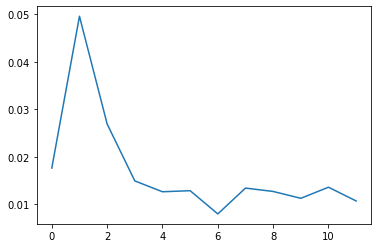

Epoch: 110 WD signal 1: 0.024995295551889483
Epoch: 110 WD signal 2: 0.026104074219617246


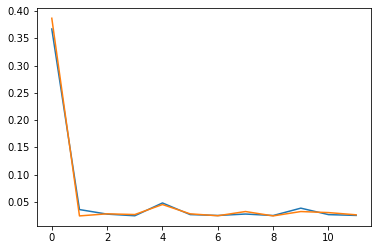

Epoch: 120 Loss D1.: 0.7553226947784424
Epoch: 120 Loss G1.: -2.907048225402832
Epoch: 120 Loss D2.: 0.7186663746833801
Epoch: 120 Loss G2.: -2.768552541732788
Epoch: 120 Loss CD.: 0.6963335871696472


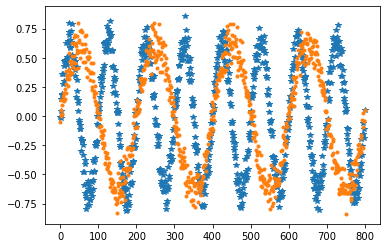

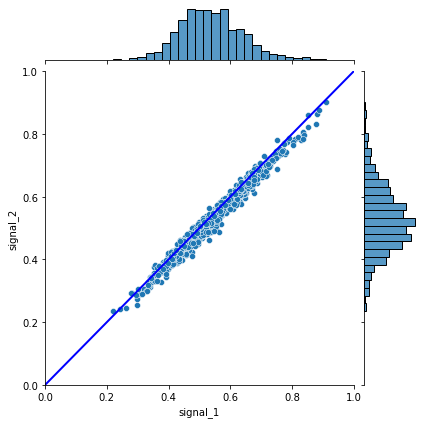

Epoch: 120 MSE: 0.010932416697528485


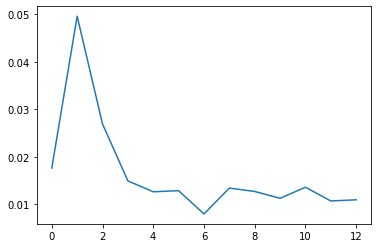

Epoch: 120 WD signal 1: 0.03879232582438191
Epoch: 120 WD signal 2: 0.03328508043360895


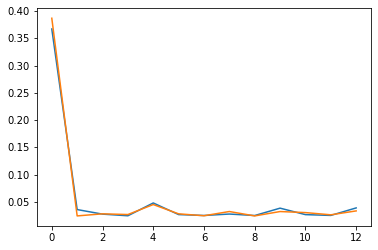

Epoch: 130 Loss D1.: 0.7576069235801697
Epoch: 130 Loss G1.: -2.8114914894104004
Epoch: 130 Loss D2.: 0.7468457818031311
Epoch: 130 Loss G2.: -2.513028621673584
Epoch: 130 Loss CD.: 0.6840308904647827


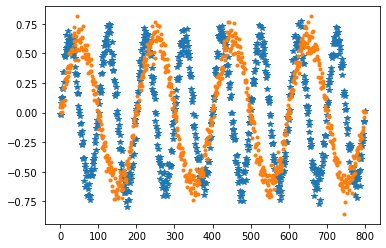

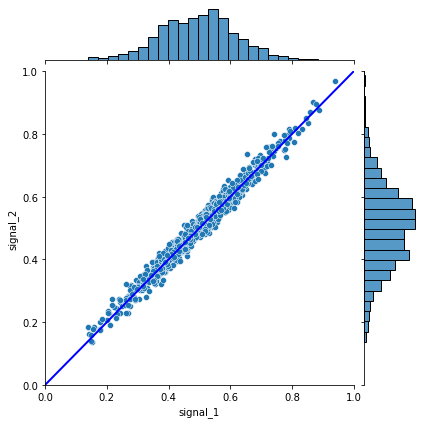

Epoch: 130 MSE: 0.011633183023812728


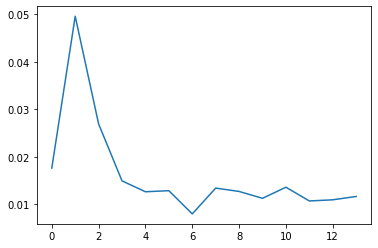

Epoch: 130 WD signal 1: 0.02512125402101905
Epoch: 130 WD signal 2: 0.02480466902794512


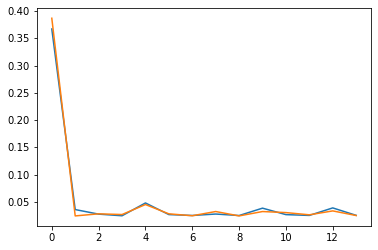

Epoch: 140 Loss D1.: 0.7382686138153076
Epoch: 140 Loss G1.: -2.5315608978271484
Epoch: 140 Loss D2.: 0.758296549320221
Epoch: 140 Loss G2.: -2.7003705501556396
Epoch: 140 Loss CD.: 0.6991409063339233


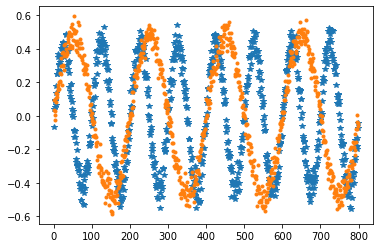

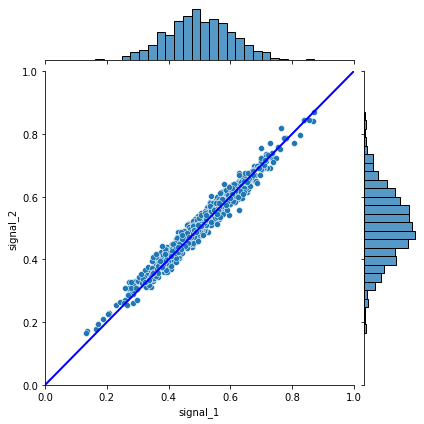

Epoch: 140 MSE: 0.011780090672518607


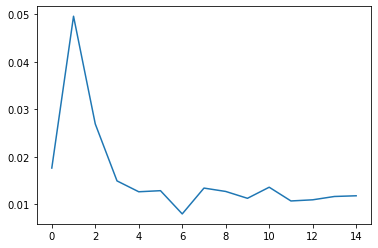

Epoch: 140 WD signal 1: 0.02461096332286676
Epoch: 140 WD signal 2: 0.02530985246119146


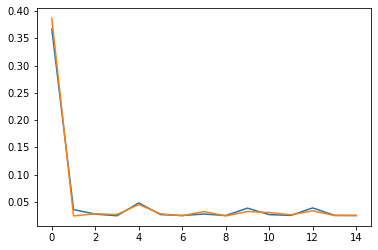

Epoch: 150 Loss D1.: 0.6873331069946289
Epoch: 150 Loss G1.: -2.9400672912597656
Epoch: 150 Loss D2.: 0.6496824622154236
Epoch: 150 Loss G2.: -2.8000216484069824
Epoch: 150 Loss CD.: 0.6864821314811707


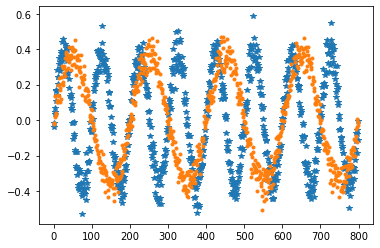

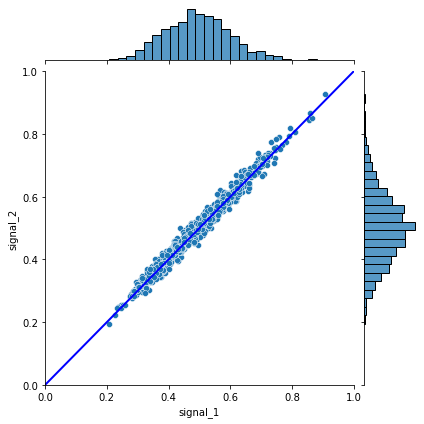

Epoch: 150 MSE: 0.009408301723776193


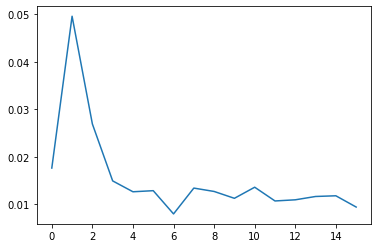

Epoch: 150 WD signal 1: 0.025410587304106762
Epoch: 150 WD signal 2: 0.02597632112400464


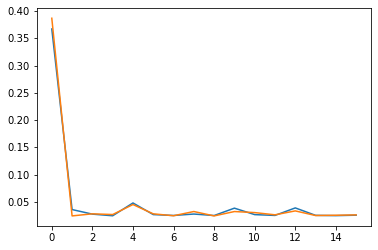

Epoch: 160 Loss D1.: 0.7261298298835754
Epoch: 160 Loss G1.: -2.528759002685547
Epoch: 160 Loss D2.: 0.7557924389839172
Epoch: 160 Loss G2.: -2.407701253890991
Epoch: 160 Loss CD.: 0.6829162836074829


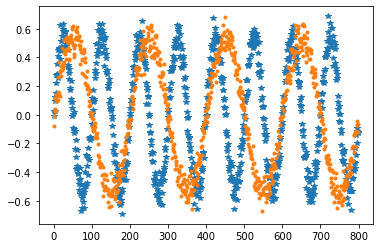

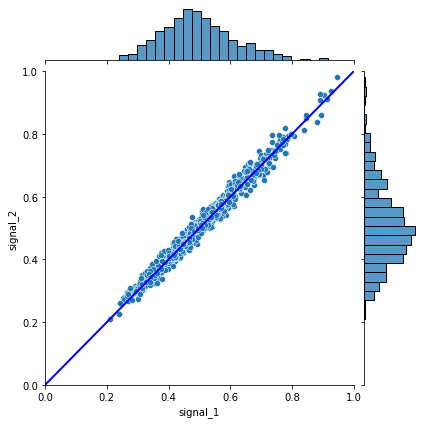

Epoch: 160 MSE: 0.010224902962036823


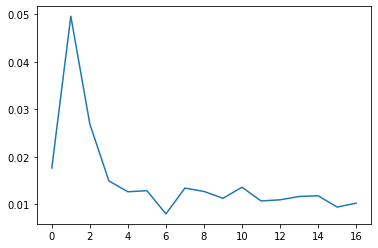

Epoch: 160 WD signal 1: 0.02663023693131865
Epoch: 160 WD signal 2: 0.026383171875640724


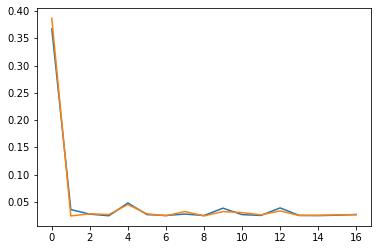

Epoch: 170 Loss D1.: 0.7497456669807434
Epoch: 170 Loss G1.: -2.3849892616271973
Epoch: 170 Loss D2.: 0.6913195252418518
Epoch: 170 Loss G2.: -2.609254837036133
Epoch: 170 Loss CD.: 0.6996541619300842


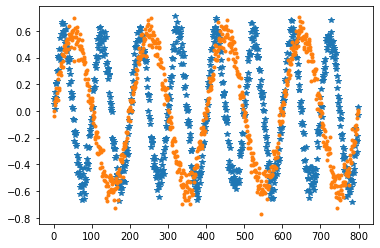

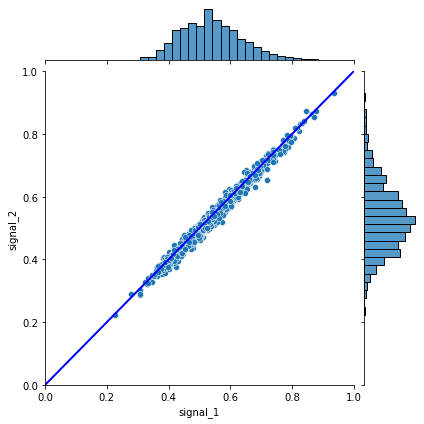

Epoch: 170 MSE: 0.008049801956263213


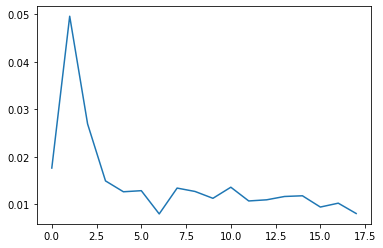

Epoch: 170 WD signal 1: 0.04052715973699347
Epoch: 170 WD signal 2: 0.03667942461936828


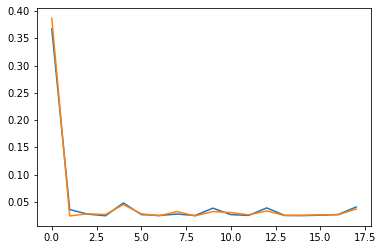

Epoch: 180 Loss D1.: 0.6878271102905273
Epoch: 180 Loss G1.: -2.5415663719177246
Epoch: 180 Loss D2.: 0.6921023726463318
Epoch: 180 Loss G2.: -2.5226645469665527
Epoch: 180 Loss CD.: 0.6994781494140625


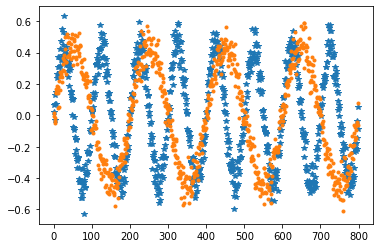

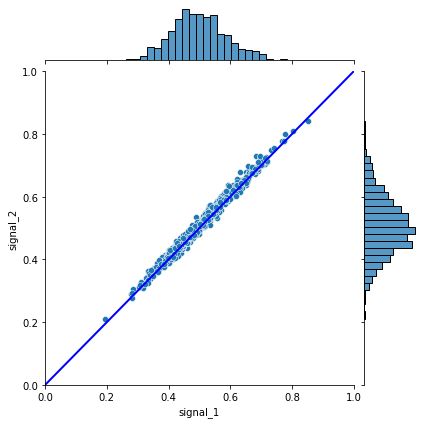

Epoch: 180 MSE: 0.007727886401298413


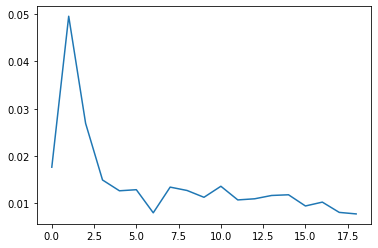

Epoch: 180 WD signal 1: 0.03323391750489675
Epoch: 180 WD signal 2: 0.03311436109913695


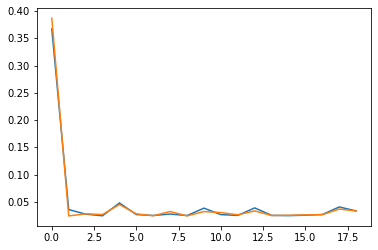

Epoch: 190 Loss D1.: 0.6891270875930786
Epoch: 190 Loss G1.: -2.6780920028686523
Epoch: 190 Loss D2.: 0.6773045063018799
Epoch: 190 Loss G2.: -2.7458653450012207
Epoch: 190 Loss CD.: 0.6892243027687073


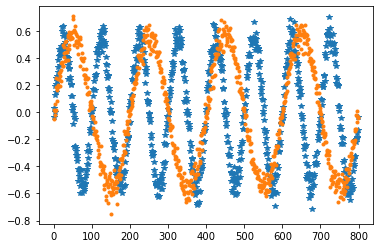

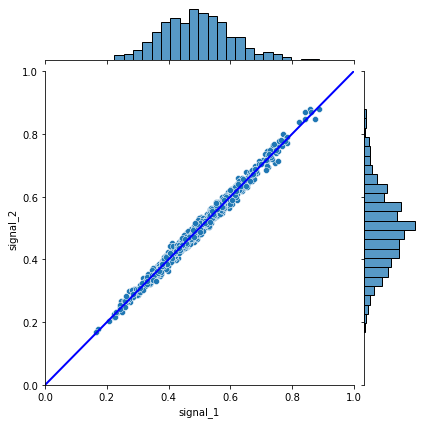

Epoch: 190 MSE: 0.007056027992336901


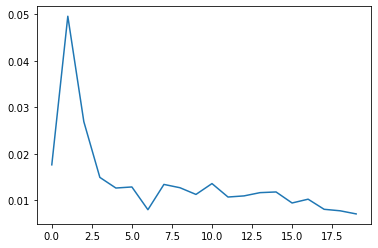

Epoch: 190 WD signal 1: 0.024806321785626136
Epoch: 190 WD signal 2: 0.025084746045245354


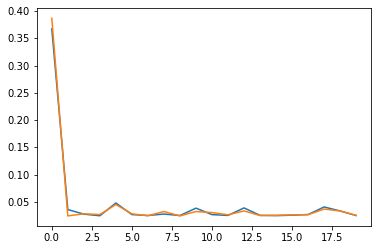

In [24]:
MSEs = []
wd_1s = []
wd_2s = []
for epoch in range(num_epochs):
    for n, (signals, ID) in enumerate(train_loader):
        signals = signals.to(device)
        n_signals = len(signals)

        signal_group = {}
        for i in range(n_groups):
            signal_group[i] = signals[:, i*n_samples:(i+1)*n_samples]

        shared_noise = torch.randn((n_signals, noise_len)).float()

        # Generating samples
        generated_samples = {}
        for i in range(n_groups):
            generated_samples[i] = generators[i](shared_noise).float()

        generated_samples_labels = torch.zeros((n_signals, 1)).to(device).float()
        real_samples_labels = torch.ones((n_signals, 1)).to(device).float()
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Data for training the discriminators
        all_samples_group = {}
        for i in range(n_groups):
            all_samples_group[i] = torch.cat(
                (signal_group[i], generated_samples[i])
            )

        # Training the discriminators
        outputs_D = {}
        loss_D = {}
        for i in range(n_groups):
            optimizers_D[i].zero_grad()
            outputs_D[i] = discriminators[i](all_samples_group[i].float())
            loss_D[i] = loss_function(outputs_D[i], all_samples_labels)
            loss_D[i].backward(retain_graph=True)
            optimizers_D[i].step()

        if with_CD:
            # Data from central discriminator
            if CD_type == 'Pairwise':
                temp_generated = []
                for i in range(n_groups):
                    temp_generated.append(generated_samples[i])
                group_generated = torch.stack(temp_generated).transpose(0,1).transpose(1,2)

                temp_real = []
                for i in range(n_groups):
                    temp_real.append(signal_group[i])
                group_real = torch.stack(temp_real).transpose(0,1).transpose(1,2)
            else:
                temp_generated = generated_samples[0]
                for i in range(1,n_groups):
                    temp_generated = torch.hstack((temp_generated, generated_samples[i]))
                group_generated = temp_generated

                temp_real = signal_group[0]
                for i in range(1,n_groups):
                    temp_real = torch.hstack((temp_real, signal_group[i]))
                group_real = temp_real

            all_samples_central = torch.cat((group_generated, group_real))
            all_samples_labels_central = torch.cat(
                (torch.zeros((n_signals, 1)).to(device).float(), torch.ones((n_signals, 1)).to(device).float())
            )

            # Training the central discriminator
            optimizer_central_discriminator.zero_grad()
            output_central_discriminator = central_discriminator(all_samples_central.float())
            loss_central_discriminator = loss_function(
                output_central_discriminator, all_samples_labels_central)
            loss_central_discriminator.backward(retain_graph=True)
            optimizer_central_discriminator.step()

        # Training the generators
        outputs_G = {}
        loss_G_local = {}
        loss_G = {}
        for i in range(n_groups):
            optimizers_G[i].zero_grad()
            outputs_G[i] = discriminators[i](generated_samples[i])
            loss_G_local[i] = loss_function(outputs_G[i], real_samples_labels)
            if with_CD:
                all_samples_central_new = {}
                output_central_discriminator_new = {}
                loss_central_discriminator_new = {}

                generated_samples_new = {}
                for j in range(n_groups):
                    generated_samples_new[j] = generators[j](shared_noise)

                    if i == j:
                        generated_samples_new[j] = generated_samples_new[j].float()
                    else:
                        generated_samples_new[j] = generated_samples_new[j].detach().float()

                if CD_type == 'Pairwise':
                    temp_generated = []
                    for j in range(n_groups):
                        temp_generated.append(generated_samples_new[j])
                    all_generated_samples = torch.stack(temp_generated).transpose(0,1).transpose(1,2)
                else:
                    temp_generated = generated_samples_new[0]
                    for j in range(1,n_groups):
                        temp_generated = torch.hstack((temp_generated, generated_samples_new[j]))
                    all_generated_samples = temp_generated
                
                all_samples_central_new[i] = torch.cat((all_generated_samples, group_real))   
                output_central_discriminator_new[i] = central_discriminator(all_samples_central_new[i].float()) 
                loss_central_discriminator_new[i] = loss_function(
                    output_central_discriminator_new[i], all_samples_labels_central)
                
                loss_G[i] = loss_G_local[i] - gamma[epoch] * loss_central_discriminator_new[i]
            else:
                loss_G[i] = loss_G_local[i]

            loss_G[i].backward(retain_graph=True)
            optimizers_G[i].step()

    # Show loss
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} Loss D1.: {loss_D[0]}")
        print(f"Epoch: {epoch} Loss G1.: {loss_G[0]}")
        print(f"Epoch: {epoch} Loss D2.: {loss_D[1]}")
        print(f"Epoch: {epoch} Loss G2.: {loss_G[1]}")
        print(f"Epoch: {epoch} Loss CD.: {loss_central_discriminator}")

        new_noise = torch.randn((1000, noise_len)).float()

        # Generating samples
        generated_samples_1_new = generators[0](new_noise).float()
        generated_samples_2_new = generators[1](new_noise).float()

        plt.plot(generated_samples_1_new[0, :].detach().numpy(), '*')
        plt.plot(generated_samples_2_new[0, :].detach().numpy(), '.')

        results_sin = pd.DataFrame()

        results_sin['signal_1'] = fit_sin(generated_samples_1_new.detach(), n_samples)
        results_sin['signal_2'] = fit_sin(generated_samples_2_new.detach(), n_samples)

        plot = sns.jointplot(data=results_sin, x="signal_1", y="signal_2")
        plot.ax_joint.set_xlim(0,1)
        plot.ax_joint.set_ylim(0,1)
        plot.ax_joint.plot([0,1], [0,1], 'b-', linewidth = 2)
        plt.show()

        results_sin['distance'] = np.zeros(len(results_sin['signal_1']))

        for index, row in results_sin.iterrows():
            results_sin['distance'][index] = norm(np.cross(p2-p1, p1-np.array([row[0], row[1]])))/denum

        MSE = results_sin['distance'].mean()
        MSEs.append(MSE)
        print(f"Epoch: {epoch} MSE: {MSE}")

        plot_mse = plt.plot(MSEs)
        plt.show()

        wd_1 = wd(results_sin['signal_1'], results_real_sin['signal_1'])
        wd_2 = wd(results_sin['signal_2'], results_real_sin['signal_2'])

        print(f"Epoch: {epoch} WD signal 1: {wd_1}")
        print(f"Epoch: {epoch} WD signal 2: {wd_2}")

        wd_1s.append(wd_1)
        wd_2s.append(wd_2)

        plt.plot(wd_1s)
        plt.plot(wd_2s)
        plt.show()